# Homework 1: Python basics and a little plotting

** Submit this notebook to bCourses to receive a credit for this assignment.**

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW01.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu". Please also submit a PDF of the jupyter notebook to bcourses.

## Problem 1: Satellite Altitudes

[Adapted from Newman, Exercise 2.2] A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every $T$ seconds. The altitude $h$ above the Earth's surface that the satellite must have is $$ h = \left( \frac{G M T^2}{4 \pi^2} \right)^{1/3} - R, $$ where $G = 6.67 \times 10^{-11}~\text{m}^3~\text{kg}^{-1}~\text{s}^{-2}$ is Newton's gravitational constant, $M = 5.97 \times 10^{24}~\text{kg}$ is the mass of the Earth, and $R = 6371~\text{km}$ is its radius.

**1a.** Write a program that, for a given value of $T$ (entered as a variable T in a cell), calculates and prints out the correct altitude in meters, kilometers, and miles, with one decimal place for each result.

*Output for 1a*: When the code cell for this part of the problem is entered, it should specify (in the comments or the Markdown cell above) what units of $T$ are assumed. The program should print out the correct altitude in meters, kilometers, and miles, with one decimal place for each result.

In [7]:
import numpy as np
PI = np.pi  #the numpy library has a lot of useful mathematical constants
T = 86400

def find_altitude(T):
    """This function calculates and prints the altitude above Earth's surface
    for a satellite with orbital period T (input in seconds)"""
    
    G = 6.67e-11 #Gravitational constant, units: m^3/kg/s^2
    M = 5.97e24  #mass of Earth, units: kg
    R = 6371e3   #radius of Earth, units: m
    
    h = ((G * M * T**2) / (4 * PI**2))**(1/3) - R #use the formula given above to to find the altitude
    
    # Now use print statements and your favorite formatting method to print the results.  
    print("{}(seconds) -> satellite altitude: {:.1f}(meters), {:.1f}(kilometers), {:.1f}(miles)".format(T, h, h/1000, h/1000/1.6))
    return h
    
find_altitude(T)

86400(seconds) -> satellite altitude: 35855910.2(meters), 35855.9(kilometers), 22409.9(miles)


35855910.176174976

*Output for 1b and 1c:* Use code cells to carry out the desired calculations, and Markdown cells to present and discuss your results.

**1b.** Use your program to calculate the altitudes of satellites that orbit the Earth once a day (so-called "geosynchronous" orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

In [8]:
# Since you defined a function above, you can just call it with different input values. 

print("every 90 mins")
for i in range(1, 86401, 1):
    if i % (90*60) == 0:
        if i == 5400: # 90min = 5400sec 
            find_altitude(i)
        if i == 86400:
            find_altitude(i)

print("every 45 mins")       
for j in range(1, 86401, 1):
    if j % (45*60) == 0:
        if j == 2700: # 45min = 2700sec
            find_altitude(j)
        if j == 86400:
            find_altitude(j)

# 45min = 2700sec: shows that altitude is negative.
# but at the end, two results shows the same altitude

every 90 mins
5400(seconds) -> satellite altitude: 279321.6(meters), 279.3(kilometers), 174.6(miles)
86400(seconds) -> satellite altitude: 35855910.2(meters), 35855.9(kilometers), 22409.9(miles)
every 45 mins
2700(seconds) -> satellite altitude: -2181559.9(meters), -2181.6(kilometers), -1363.5(miles)
86400(seconds) -> satellite altitude: 35855910.2(meters), 35855.9(kilometers), 22409.9(miles)


**1c.** Technically a geosynchronous satellite is one that orbits the Earth once per *sidereal day*, which is 23.93 hours, not 24 hours. Why is this? And how much difference will it make to the altitude of the satellite?

In [9]:
# the reason why 23.93 hours: Earth orbits while it rotates.

hours = [24, 23.93]
print("<24 hours>")
h_24 = find_altitude(hours[0]*3600)
print("<23.93 hours>")
h_23 = find_altitude(hours[1]*3600)
dif = h_24 - h_23
print("difference of satellite altitude: {:.1f} meters, {:.1f} kilometers, {:.1f} miles".format(dif, dif/1000, dif/1000/1.6))

<24 hours>
86400(seconds) -> satellite altitude: 35855910.2(meters), 35855.9(kilometers), 22409.9(miles)
<23.93 hours>
86148.0(seconds) -> satellite altitude: 35773762.3(meters), 35773.8(kilometers), 22358.6(miles)
difference of satellite altitude: 82147.8 meters, 82.1 kilometers, 51.3 miles


#### Hints

Be very careful of units! Unlike wolframalpha.com, python is oblivious to what units your various numbers represent. You need to carefully keep track of them to make sure that your units work out. Not converting units properly can lead to [very expensive disasters](https://en.wikipedia.org/wiki/Mars_Climate_Orbiter) or just wrong scientific results ...

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!

## Problem 2: Perfect Hardboiled Eggs

[Adapted from Langtangen, Exercise 1.12. You may derive the formula in Physics 112 or Physics 89] As an egg cooks, the proteins first denature and then coagulate. When the temperature exceeds a critical point, reactions begin and proceed faster as the temperature increases. In the egg white the proteins start to coagulate for temperatures above 63 C, while in the  yolk the proteins start to coagulate for temperatures above 70 C. For a soft boiled egg, the white needs to have been heated long enough to coagulate at a temperature above 63 C, but the yolk should not be heated above 70 C. For a hard boiled egg, the center of the yolk should be allowed to reach 70 C.

The following formula expresses the time $t$ it takes (in seconds) for the center of the yolk to reach the temperature $T_y$ (in Celsius degrees): $$ t = \frac{M^{2/3} c \rho^{1/3}}{K \pi^2 (4\pi/3)^{2/3}} \ln \left[ 0.76 \frac{T_0 - T_w}{T_y - T_w} \right] . $$ Here, $M$, $\rho$, $c$, and $K$ are properties of the egg:
* $M$ is the mass,
* $\rho$ is the density,
* $c$ is the specific heat capacity, and 
* $K$ is the thermal conductivity.

Relevant values are
* $M = 64~\text{g}$ for a large egg (USA size XL: en.wikipedia.org/wiki/Chicken_egg_sizes),
* $\rho = 1.0378~\text{g cm}^{-3}$,
* $c = 3.7~\text{J g}^{-1}\,\text{K}^{-1}$, and
* $K = 5.4 \cdot 10^{-3}~\text{W cm}^{-1}\,\text{K}^{-1}$.

Furthermore,
* $T_w$ is the temperature (in C degrees) of the boiling water, and
* $T_0$ is the original temperature (in C degrees) of the egg before being put in the water.

Suppose we want our eggs hard-boiled. Implement the formula in a program, set $T_w = 100~\text{C}$ and $T_y = 70~\text{C}$, and compute $t$ for a large egg taken from the fridge ($T_0 = 4~\text{C}$) and from room temperature ($T_0 = 20~\text{C}$). Also compute the results for a small egg ($M = 42~\text{g}$).

*Output for 2:*
When you run your code cell, it should produce the following text, with your numbers instead of the `TTT`, `MMM`, and `SSS` placeholders:

    To hard-boil a large egg taken directly from the fridge, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a small egg taken directly from the fridge, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a large egg starting from room temperature, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a small egg starting from room temperature, cook it for TTT minutes (MMM min, SSS sec).

The `TTT` placeholders should be values in minutes to two decimal places. The `MMM` and `SSS` placeholders should be rounded to the nearest minute/second, with no decimal places. For example,

    To hard-boil a large egg taken directly from the fridge, cook it for 56.78 minutes (56 min 47 sec).
    

In [6]:
import numpy as np
PI = np.pi  #the numpy library has a lot of useful mathematical constants

def find_time(T_initial, M_egg):
    """This function calculates and returns the time (in seconds)
    for the center of the yolk to reach the temperature T_yolk, given
    the initial egg temperature T_initial (in degrees Celsius). The mass 
    of the egg (in grams) is also taken as an input."""
    
    T_water = 100 #temperature of boiling water, units: degrees Celsius
    T_yolk  = 70  #temperature of cooked yolk, units: degrees Celsius
    rho = 1.0378  #density of egg, units: grams/cm^3
    c = 3.7       #specific heat capacity, units: Joules/grams/(degrees Kelvin)
    K = 5.4e-3    #thermal conductivity, units: Watts/cm/(degrees Kelvin)
    
    # Use the formula given above to to find the time needed to cook the egg.
    t = M_egg**(2/3) * c * rho**(1/3) / \
          (K * PI**2 * (4*PI/3)**(2/3)) * \
          np.log(0.76 * ((T_initial) - (T_water))/((T_yolk) - (T_water)))
    
    return t/60


# You can now use your defined function to find the times needed to cook the small/large eggs with different starting temperatures
M_egg_large = 64
M_egg_small = 42
fridge_T0 = 4
room_T0 = 20


l_e_f = find_time(fridge_T0, M_egg_large)
s_e_f = find_time(fridge_T0, M_egg_small)
l_e_r = find_time(room_T0, M_egg_large)
s_e_r = find_time(room_T0, M_egg_small)

print("To hard-boil a large egg taken directly from the fridge, cook it for {:.2f} minutes ({} min, {:.0f} sec).".format(l_e_f, int(l_e_f), (l_e_f - int(l_e_f))*100))
print("To hard-boil a small egg taken directly from the fridge, cook it for {:.2f} minutes ({} min, {:.0f} sec).".format(s_e_f, int(s_e_f), (s_e_f - int(s_e_f))*100))
print("To hard-boil a large egg starting from room temperature, cook it for {:.2f} minutes ({} min, {:.0f} sec).".format(l_e_r, int(l_e_r), (l_e_r - int(l_e_r))*100))
print("To hard-boil a small egg starting from room temperature, cook it for {:.2f} minutes ({} min, {:.0f} sec).".format(s_e_r, int(s_e_r), (s_e_r - int(s_e_r))*100))

To hard-boil a large egg taken directly from the fridge, cook it for 6.41 minutes (6 min, 41 sec).
To hard-boil a small egg taken directly from the fridge, cook it for 4.84 minutes (4 min, 84 sec).
To hard-boil a large egg starting from room temperature, cook it for 5.10 minutes (5 min, 10 sec).
To hard-boil a small egg starting from room temperature, cook it for 3.85 minutes (3 min, 85 sec).


#### Hints

Writing the entire formula in one line is difficult to type, difficult to read, difficult to debug---and you have to retype the entire calculation just to change one piece of it. Try breaking it down in smaller chunks assigned to variables, and combine those chunks to produce the final result.

Beware of integer division!

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!

## Problem 3: Estimating Half-Life

[Adapted from Ayars, Problem 0-3] The data in file [Ba137.txt](https://raw.githubusercontent.com/celegante/code_chapter_0-_github/master/Ba137.txt) is actual data from a radioactive decay experiment (you should already have the file from the Workshop). The first column is the number of decays $N$, the second is the time $t$ in seconds. We'd like to know the half-life $t_{1/2}$ of $^{137}\text{Ba}$. It should follow the decay equation $$ N = N_0 e^{-\lambda t} $$ where $\lambda = \frac{\log 2}{t_{1/2}}$. Using the techniques you've learned from the lecture and workshop, load the data from the file Ba137.txt into appropriately-named variables. Experiment with different values of $N$ and $\lambda$ and plot the resulting equation on top of the data. (Python uses `exp()` to calculate the exponential function: i.e. `y = A*exp(-L*time)` ) Don't worry about automating this process yet (unless you *really* want to!) just try adjusting things by hand until the equation matches the data pretty well. What is your best estimate for $t_{1/2}$?

*Output for 3:*
When you run your code cell, it should produce a well-labeled plot with both the data and your curve of best fit. It should also print a message to the terminal which says, "My best estimate for the half life is $x$", where $x$ is your estimate with units.

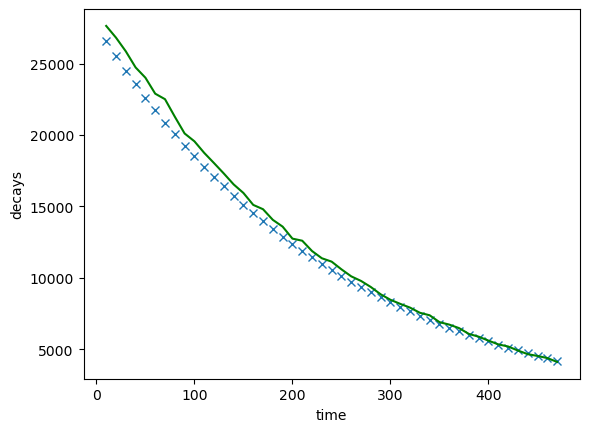

My best estimate for the half life is 75


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Starting by reading in the data from the text file
decays, time = np.loadtxt("Ba137.txt", unpack = True)

# 'counts' and 'times' are both Python lists; you can try printing to get an idea of what values they contain
t_1_2 = 75
N_0 = 27635
L = np.log10(2)/t_1_2

# The numpy library has an exponential function; use np.exp(x) to return e^x
N = N_0*np.exp(-L*time)

plt.figure()    # Start a clean figure
plt.plot(time, N_0*np.exp(-L*time), 'x')
plt.plot(time, decays, '-g')
plt.xlabel('time')
plt.ylabel('decays')
plt.show()

print("My best estimate for the half life is {}".format(t_1_2))

#### Hints

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!